<a href="https://colab.research.google.com/github/PedroGonzalezBeermann2020/QM206EXAM2023/blob/main/Examen_Semestral_Cristibel_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estudiante: Cristibel Araúz
Cédula: 4-823-1229

Problema 1

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import seaborn as sns
import pandas as pd
from scipy.optimize import minimize

In [ ]:
def generar_cadena_adn(longitud=1000):
    nucleotidos = ['G', 'C', 'A', 'T']
    cadena = [random.choice(nucleotidos) for _ in range(longitud)]
    return ''.join(cadena)

def contar_ocurrencias(cadena, secuencia='GCAT'):
    count = 0
    for i in range(len(cadena) - len(secuencia) + 1):
        if cadena[i:i+len(secuencia)] == secuencia:
            count += 1
    return count

In [ ]:
def simulacion(n_simulaciones=10000):
    ocurrencias_por_cadena = []

    for _ in range(n_simulaciones):
        cadena = generar_cadena_adn()
        ocurrencias = contar_ocurrencias(cadena)
        ocurrencias_por_cadena.append(ocurrencias)

    return ocurrencias_por_cadena

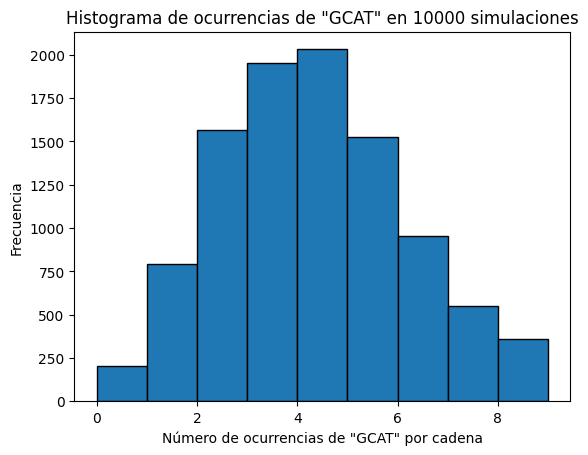

In [ ]:
def graficar_histograma(ocurrencias_por_cadena):
    plt.hist(ocurrencias_por_cadena, bins=range(10), edgecolor='black')
    plt.xlabel('Número de ocurrencias de "GCAT" por cadena')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de ocurrencias de "GCAT" en 10000 simulaciones')
    plt.show()

# Realizar la simulación y graficar el histograma
ocurrencias_por_cadena = simulacion()
graficar_histograma(ocurrencias_por_cadena)

problema 2

In [ ]:
def generar_posiciones_iniciales(N=10000):
    return np.random.uniform(low=-1, high=1, size=N)

def simular_difusion(posiciones_iniciales, iteraciones=1000, D=0.1):
    posiciones = posiciones_iniciales.copy()

    for _ in range(iteraciones):
        cambios_dx = np.random.uniform(low=-1, high=1, size=len(posiciones))
        posiciones += cambios_dx * np.sqrt(2 * D)

    return posiciones

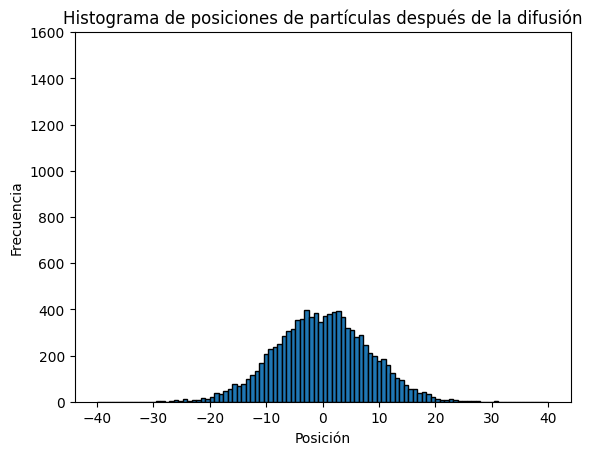

In [ ]:
def graficar_histograma(posiciones, bins=100):
    plt.hist(posiciones, bins=bins, edgecolor='black', range=(-40, 40))
    plt.title('Histograma de posiciones de partículas después de la difusión')
    plt.xlabel('Posición')
    plt.ylabel('Frecuencia')
    plt.ylim(0, 1600)
    plt.show()

# Generar posiciones iniciales
posiciones_iniciales = generar_posiciones_iniciales()

# Simular la difusión
posiciones_finales = simular_difusion(posiciones_iniciales)

# Graficar el histograma de posiciones finales
graficar_histograma(posiciones_finales)


problema 3

In [ ]:
def mecanismo_cinetico(y, t, k1, k2):
    A, B, C = y

    dAdt = -k1 * A
    dBdt = k1 * A - k2 * B
    dCdt = k2 * B

    return [dAdt, dBdt, dCdt]
y0 = [1.0, 0.0, 0.0]  # Concentraciones iniciales de A, B y C
k1 = 0.1  # Constante de velocidad para la reacción A → B
k2 = 0.05  # Constante de velocidad para la reacción B → C

In [ ]:
# Tiempo de integración
tiempo = np.linspace(0, 10, 100)  # Intervalo de tiempo de 0 a 10 con 100 puntos

# Resolver las ecuaciones diferenciales
solucion = odeint(mecanismo_cinetico, y0, tiempo, args=(k1, k2))


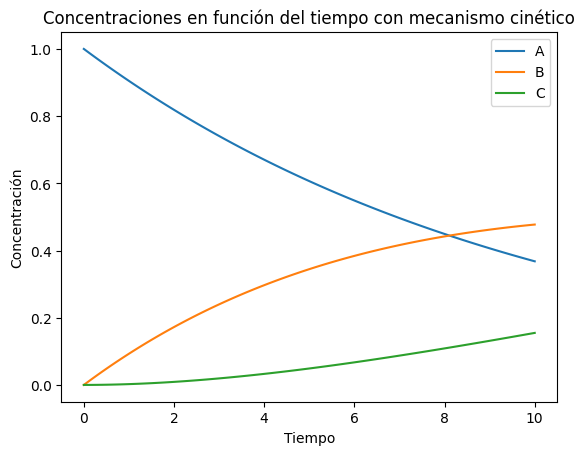

In [ ]:
# Graficar las concentraciones en función del tiempo
plt.plot(tiempo, solucion[:, 0], label='A')
plt.plot(tiempo, solucion[:, 1], label='B')
plt.plot(tiempo, solucion[:, 2], label='C')
plt.xlabel('Tiempo')
plt.ylabel('Concentración')
plt.legend()
plt.title('Concentraciones en función del tiempo con mecanismo cinético')
plt.show()

In [ ]:
def f(secuencia):
    complemento = {'a': 'g', 'g': 'a', 'c': 't', 't': 'c'}
    complementaria = ''

    for x in secuencia:
        if x in complemento:
            complementaria = complementaria + complemento[x]
        else:
            complementaria = complementaria + x

    return complementaria

secuencia_dada = "ggattatggaatacgttatcaaggtgagttacatacccaaatcgtcgccatcgagaatattgtatcatttgctattgtaaccggcttagcgatctacgcacatttgagaaaaattcgaactggaactcttctggcgaacttctccctctttacactgttgtcttggtgcgcgttcccctacttaggtgaactgccttaatgctaacgtagcagctgatctaagttctcaaagtcgaatatcctatcgtccgcatttgcgtctcaacagtcatggccgctttatcccgaaagcggacactagtaggaatgcattaatcatccataagagctttgaatttttcaatagcatctgggtcgtcatccaaaacccgttcgtagacacttgagtcttccgcccaaaattctggaaggattgaagtctcgaagcgatatatatcaagttgccgaacaaccatgcgccaatttgaaggaatggctaactccgtcggtttaaaatagtgaaatgggtaaggtgttggataccccgagctatcggcatccaaatagtaccacggaacattgtcccgaaataccaatccaaatacctgataagtcttgccaacatcaagaccttgcaattcagcattttcaactcccaatagctttagaatatgttgttggcagagttaaatcttggcagcaacgacaaatgcattttcttaatgtccgcttttgcgcccaaagcggacactagcaaaatactatcgccgcgtcgccagccagattatatgatgcgccccgcgtttgcctcgcgcgcggacgggggcttcctcaaccatgaatccgacgtctgccaatcgtctggtgaattttgcatccggtgcggatgaccagactgccagtatcccgccagggcgcagcgccctttgcgcggtttttaagccggccgctgtgtataatctgtcgttcgacgcatgggtaatgccatcggggccattgtccacatccagaaggatcgcgtcatatgacccgttattttgagagattagatcaaacacatctgcggtttcgatggtaacgcgcgggtcgtcgaggctgccatcgaatatctctgccatcggcccctgagcccattgaacgacggcgggcaccagttctgccacgatgatctctgcctttgcgctcaataaagg"
secuencia_complementaria = f(secuencia_dada)
print("Secuencia de ADN original:", secuencia_dada)
print("Secuencia complementaria:", secuencia_complementaria)

Secuencia de ADN original: ggattatggaatacgttatcaaggtgagttacatacccaaatcgtcgccatcgagaatattgtatcatttgctattgtaaccggcttagcgatctacgcacatttgagaaaaattcgaactggaactcttctggcgaacttctccctctttacactgttgtcttggtgcgcgttcccctacttaggtgaactgccttaatgctaacgtagcagctgatctaagttctcaaagtcgaatatcctatcgtccgcatttgcgtctcaacagtcatggccgctttatcccgaaagcggacactagtaggaatgcattaatcatccataagagctttgaatttttcaatagcatctgggtcgtcatccaaaacccgttcgtagacacttgagtcttccgcccaaaattctggaaggattgaagtctcgaagcgatatatatcaagttgccgaacaaccatgcgccaatttgaaggaatggctaactccgtcggtttaaaatagtgaaatgggtaaggtgttggataccccgagctatcggcatccaaatagtaccacggaacattgtcccgaaataccaatccaaatacctgataagtcttgccaacatcaagaccttgcaattcagcattttcaactcccaatagctttagaatatgttgttggcagagttaaatcttggcagcaacgacaaatgcattttcttaatgtccgcttttgcgcccaaagcggacactagcaaaatactatcgccgcgtcgccagccagattatatgatgcgccccgcgtttgcctcgcgcgcggacgggggcttcctcaaccatgaatccgacgtctgccaatcgtctggtgaattttgcatccggtgcggatgaccagactgccagtatcccgccagggcgcagcgccctttgcgcggtttttaagccggccgctgtgtataatctgtcgttcgacgcatgggtaatgccatcggggc